# Random Forest Regression for Youngs Modulus Prediction #

In [153]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
# Loading the data
data = pd.read_csv("Final_Youngs_Data.csv")
data.head()

,Unnamed: 0,Alloy,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron,Young's Mod (GPa)
0,0,Al0.5CoCrCuFeNi,0.487880,346.087653,-4.853717,3.172259,0.845568,4.169229,5126.805332,1693.017839,0.109326,14.698051,8.27281,161.1
1,1,Al0.3CoCrFeNi,0.449913,295.639150,-9.931969,3.028509,0.908382,3.757616,2332.647391,1806.304922,0.107517,12.826063,7.88379,168.0
2,2,Al0.5CrCuFeNi2,0.381975,344.853267,-5.856117,3.357152,0.714539,4.199646,3627.716399,1685.745039,0.113094,12.602340,8.45463,172.1
3,3,CoCrFeNi,0.365443,180.372358,-3.714500,2.951900,126.282311,0.302116,5808.140599,1871.750000,0.096695,11.526293,8.25000,173.9
4,4,NiCoCr,0.418117,204.299411,-5.025233,2.980337,337.314135,0.164559,3439.052841,1891.981080,0.111454,9.134363,8.33325,174.4


In [156]:
# Getting the features and label
X = data.iloc[:,1:data.shape[1]-1]
Y = data.iloc[:,-1]
colnames = X.columns[1:data.shape[1]]
colnames

Index(['Diff. Lattice Constants', 'Diff. Melting Point', 'Mixing Enthalpy',
       'Lattice Constants', 'Lambda', 'Diff. in atomic radii', 'Omega',
       'Melting Temp.', 'Diff. Electronegativity', 'Mixing Entropy',
       'Valence electron'],
      dtype='object')

In [157]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X.iloc[:,1:X.shape[1]]))
scaled_X.columns = colnames
scaled_X.head()

,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron
0,0.003501,-0.477227,0.304312,-0.333533,-0.241138,-0.211592,-0.223883,-1.038749,-0.722403,1.002740,1.207983
1,-0.054956,-0.770745,-0.398231,-0.717594,-0.239976,-0.429510,-0.300954,-0.795860,-0.739039,0.362841,0.977119
2,-0.159559,-0.484409,0.165637,0.160451,-0.243562,-0.195489,-0.265232,-1.054342,-0.687752,0.286366,1.315885
3,-0.185013,-1.441387,0.461915,-0.922273,2.079099,-2.258933,-0.205090,-0.655545,-0.838563,-0.081457,1.194447
4,-0.103912,-1.302175,0.280584,-0.846297,5.982611,-2.331759,-0.270436,-0.612169,-0.702829,-0.899087,1.243852


In [158]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(scaled_X,Y,test_size = 0.3, random_state =1)

In [160]:
# Defining the parameters
params = {
    'n_estimators': 500,
    'max_depth': 8
}

# Creating the regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(**params, random_state = 1)
rf_reg.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [161]:
# crossvalidating
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

cv_error = cross_val_score(rf_reg,X_train,Y_train,cv = 5, scoring = 'neg_mean_absolute_error')
print("The cross validated test score for the training data set is :",round(np.mean(cv_error),4))

The cross validated test score for the training data set is : -32.6263


In [162]:
# predicting for test set
pred = gbr.predict(X_test)
error = mean_absolute_error(Y_test,pred)
print("The Mean Absolute Error for the Test set is :", error)

The Mean Absolute Error for the Test set is : 17.550334347182556


In [163]:
# Grid Search For Hypermparameter Optimization

from sklearn.model_selection import GridSearchCV

# Defining the grid values
grid_value = {
    'n_estimators' : [100,200,300,400,500,600,700,800,900,1000],
    'max_depth': [3,5,8],
}

# Redefining the regressor
reg = RandomForestRegressor(random_state= 1)

# Gridsearch
clf = GridSearchCV(reg, grid_value, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [164]:
print('Best parameter:',clf.best_params_)
print('Best Score:',clf.best_score_)

Best parameter: {'max_depth': 8, 'n_estimators': 100}
Best Score: -32.541014339975554


In [165]:
# Creating the optimized parameter
opt_rfr = RandomForestRegressor(**clf.best_params_,random_state = 1)
opt_rfr.fit(X_train,Y_train)

# Predicting the results for the test set
test_pred = opt_rfr.predict(X_test)

#error
test_error = mean_absolute_error(Y_test,test_pred)
print("The test error is:",test_error)

The test error is: 28.030359025209442


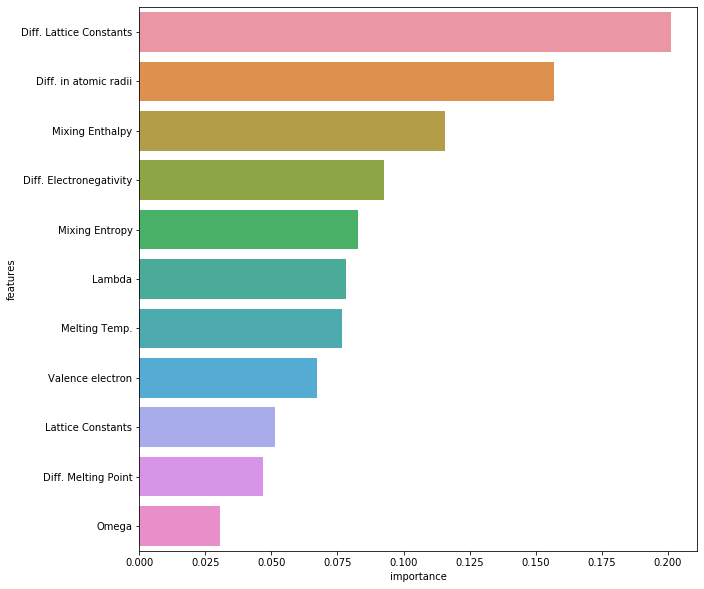

In [166]:
importance = list(opt_rfr.feature_importances_)
imp = pd.DataFrame({'features': colnames,'importance':importance})
imp = imp.sort_values(by = 'importance',axis = 0, ascending = False)
plt.figure(figsize = (10,10))
sns.barplot(imp.loc[:,'importance'],imp.loc[:,'features'])

1.0